## Hierarchical Clustering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import json

In [2]:
data = pd.read_csv('../../result/caseolap.csv')
data = data.set_index('protein')
ndf = data
ndf.head(2)

,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
protein,,,,,,,,,,,,,,,,,,,
Q96DA6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005083,0.0
Q96IX5,0.0,0.0,0.0,0.014041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003432,0.0,0.0,0.0,0.000000,0.0


In [3]:
ndf.shape

(728, 19)

In [4]:
ndata = ndf.copy(deep = True)
ndf.describe()

,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,0.001306,0.001388,0.000978,0.002977,0.000895,0.001573,0.001204,0.000617,0.001299,0.001506,0.005791,0.007522,0.003890,0.009204,0.007859,0.006722,0.001877,0.001585,0.001399
std,0.005324,0.005050,0.010815,0.009126,0.005864,0.006923,0.011017,0.005953,0.011845,0.010900,0.011223,0.017512,0.011187,0.014491,0.013473,0.013377,0.012170,0.009283,0.005230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001216,0.000000,0.003435,0.003527,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007998,0.011220,0.005442,0.012323,0.011845,0.009909,0.000000,0.000000,0.000000
max,0.067128,0.048236,0.280080,0.097306,0.086958,0.079369,0.227914,0.127713,0.236665,0.181252,0.121327,0.253433,0.204669,0.110236,0.173541,0.182748,0.307748,0.188174,0.052904


#### Clustering

In [5]:
# Change the cutoff for how high a score must be to qualify for clustering
solid_cutoff = [0.03]*18
mdata = ndata.copy(deep =True)

dis = ["LHON", "MELAS", "ADOA", "Leigh", "MERRF", "KSS", "Alpers", "LBSL", "PDD", "PEO", "MS", "Parkin", "ALS", "AD", "Epil", "Schiz", "FA", "HSP", "WD"]
idx = list(mdata.index)
data_dict = []

for item in idx:
    data = mdata.loc[item,:]
    lst =[data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15],data[16],data[17],data[18]]
    m = max(lst)
    for e,cut in zip(lst,solid_cutoff):
        if e == m:
            if e > cut:
                    data_dict.append({"protein":item,"LHON":data[0],"MELAS":data[1], "ADOA":data[2],"Leigh":data[3],"MERRF":data[4],"KSS":data[5],"Alpers":data[6],"LBSL":data[7], "PDD":data[8], "PEO":data[9],"MS":data[10],"Parkin":data[11],"ALS":data[12],"AD":data[13],"Epil":data[14],"Schiz":data[15],"FA":data[16],"HSP":data[17],"WD":data[18]})

In [6]:
cdata = pd.DataFrame(data_dict)
cdata.index = cdata['protein']
cdata = cdata.drop('protein', axis = 1)

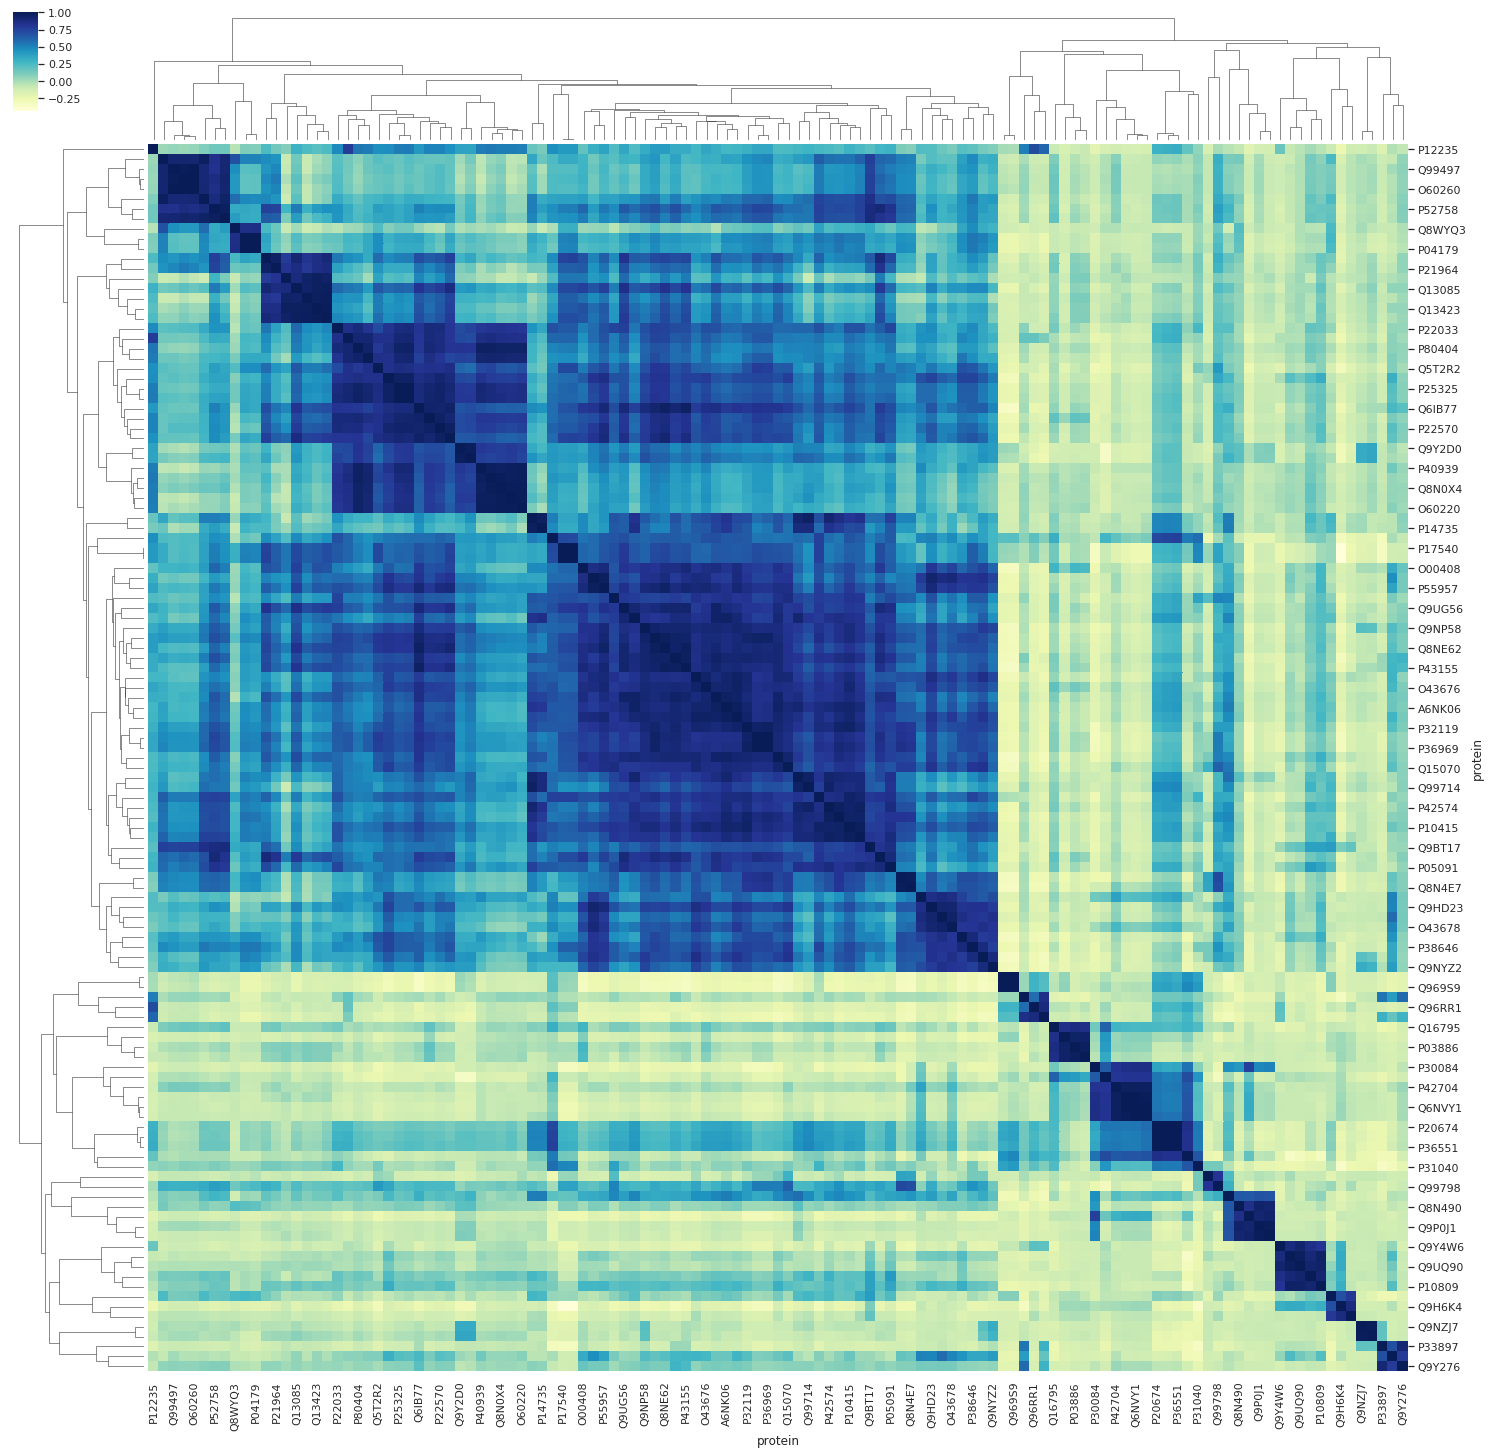

In [7]:
size=(25,25)
g = sns.clustermap(cdata.T.corr(),\
                   figsize=size,\
                   cmap = "YlGnBu",\
                   metric='seuclidean')



g.savefig('Data/cutoff-%s-cluster.pdf'%solid_cutoff[0], format='pdf', dpi=300)
g.savefig('Data/cutoff-%s-cluster.png'%solid_cutoff[0], format='png', dpi=300)

indx = g.dendrogram_row.reordered_ind

In [8]:
protein_cluster = []
for num in indx:
    for i,ndx in enumerate(cdata.index):
         if num == i:
                protein_cluster.append({'id':i,"protein": ndx,"LHON":list(cdata.loc[ndx,:])[0],"MELAS":list(cdata.loc[ndx,:])[1],"ADOA":list(cdata.loc[ndx,:])[2],"Leigh":list(cdata.loc[ndx,:])[3],"MERRF":list(cdata.loc[ndx,:])[4],"KSS":list(cdata.loc[ndx,:])[5],"Alpers":list(cdata.loc[ndx,:])[6],"LBSL":list(cdata.loc[ndx,:])[7],"PDD":list(cdata.loc[ndx,:])[8],"PEO":list(cdata.loc[ndx,:])[9],"MS":list(cdata.loc[ndx,:])[10],"Parkin":list(cdata.loc[ndx,:])[11],"ALS":list(cdata.loc[ndx,:])[12],"AD":list(cdata.loc[ndx,:])[13],"Epil":list(cdata.loc[ndx,:])[14],"Schiz":list(cdata.loc[ndx,:])[15],"FA":list(cdata.loc[ndx,:])[16],"HSP":list(cdata.loc[ndx,:])[17],"WD":list(cdata.loc[ndx,:])[18]})

In [9]:
protein_cluster_df = pd.DataFrame(protein_cluster)
protein_cluster_df = protein_cluster_df.set_index("protein")

In [10]:
protein_cluster_df = protein_cluster_df.drop(["id"], axis = 1)
protein_cluster_df.head()

,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
protein,,,,,,,,,,,,,,,,,,,
P12235,0.0,0.000000,0.0,0.0,0.000000,0.018692,0.0,0.0,0.0,0.083389,0.016641,0.016737,0.008937,0.024735,0.062612,0.022935,0.0,0.0,0.012008
Q9Y6H1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.032543,0.014129,0.008725,0.000000,0.000000,0.0,0.0,0.000000
Q99497,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.018562,0.173782,0.018152,0.011001,0.004571,0.000000,0.0,0.0,0.004427
Q9BXM7,0.0,0.004404,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.007953,0.179245,0.011584,0.016995,0.000000,0.010163,0.0,0.0,0.004402
O60260,0.0,0.003966,0.0,0.0,0.007038,0.000000,0.0,0.0,0.0,0.000000,0.011716,0.253433,0.016224,0.024927,0.007299,0.002614,0.0,0.0,0.006320


#### Barplot

In [11]:
protein_cluster_df.plot.barh(stacked=True,figsize=(100,200))
plt.gca().invert_yaxis()
plt.legend(fontsize = 25)
plt.savefig('Data/cutoff-%s-cluster-bar.pdf'%solid_cutoff[0])
plt.savefig('Data/cutoff-%s-cluster-bar.png'%solid_cutoff[0])